In [1]:
print('Hello')

Hello


In [2]:
import torch 
from torchvision import datasets, transforms
import helper

#Define transforms to normalize data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

#Dowloading  Fashin MNIST dataset and loading the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw



Extracting C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\SURFACE/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...


C:\Users\SURFACE\anaconda3\envs\deep-learning\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


Train Image: 
Test Image: 


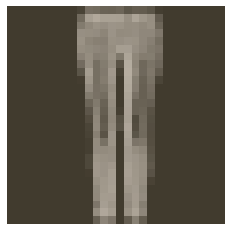

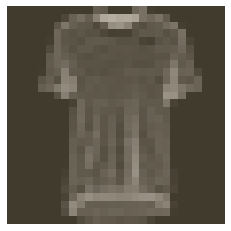

In [12]:
#Seeing an image
images, labels = next(iter(trainloader))
print("Train Image: ")
#helper.imshow(images[1])
helper.imshow(images[0,:]);

#Test set images
images_tst, labels_tst = next(iter(testloader))
print("Test Image: ")
helper.imshow(images_tst[0,:]);

# Building the Network

In [13]:
from torch import nn, optim
import torch.nn.functional as F

In [18]:
#Defining our model architechture

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        #Flatten the dataset
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.log_softmax(self.output(x), dim =1)
        
        return x
            

# Training the Network

In [19]:
#Creating the network, loss funtion and optimizer
model = Classifier()
#print(model.hidden1.weight[0])
loss_function = nn.NLLLoss() # to calculate loss 
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [21]:
# Training the network here
epoch = 10
for i in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        prediction = model(images)
        loss = loss_function(prediction, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss: ", running_loss/len(trainloader))

Training loss:  0.5779314936637115
Training loss:  0.4597693328092347
Training loss:  0.42002763754841105
Training loss:  0.4144951716732623
Training loss:  0.39761624138937324
Training loss:  0.39867132292913476
Training loss:  0.4067004550494619
Training loss:  0.3750969630950041
Training loss:  0.3688120401220154
Training loss:  0.37704326733470217


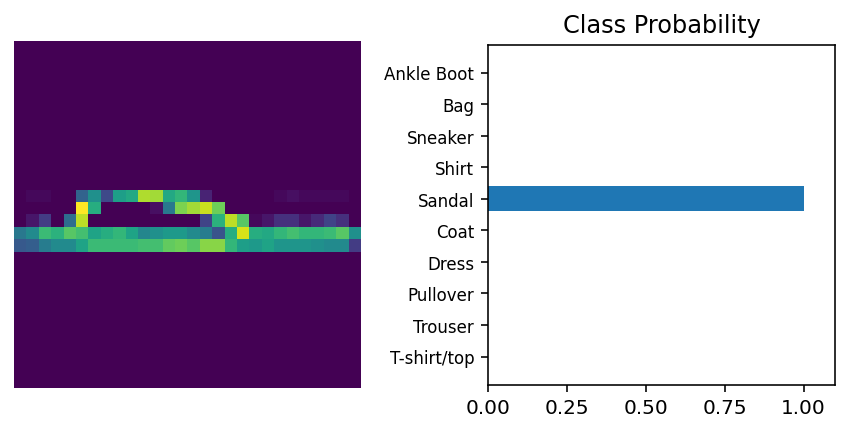

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

#Testing our network
dataiter = iter(testloader)
images_test, labels_test = dataiter.next()
img = images_test[27]

#Calculating the class probabilities for image

p = torch.exp(model(img))

#Plotting the images and probabilities
helper.view_classify(img, p, version = 'Fashion')